In [14]:
import pandas

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['xtick.labelsize'] = '14'
plt.rcParams['ytick.labelsize'] = '14'

%matplotlib inline
# notebook

In [15]:
# Replace this variable accordingly 
path_to_results = "../../experiments/BiVar/2018-11-10-18-25_BiVarPowerDiscrete_/"

In [16]:
data = pandas.read_csv(path_to_results + "BiVarPowerDiscrete.csv", header=0)
data["category"] = [x.split("-")[0] for x in data["refId"]]

In [7]:
from IPython.display import display
pandas.options.display.max_columns = None

In [17]:
data.head() # Here we have this weired line too, I deleted it 

,refId,nDim,noise,n,d,nRep,testId,powerAt90,powerAt95,powerAt99,thresholdAt90,thresholdAt95,thresholdAt99,avgContrast,stdContrast,avgWalltime,stdWalltime,avgCPUtime,stdCPUtime,avgPrepWalltime,stdPrepWalltime,avgPrepCPUtime,stdPrepCPUtime,category
0,0-Hypothesis,2,0.0,1000,100,500,Correlation,0.1,0.05,0.01,0.041152,0.053348,0.070884,0.000175,0.032100,0.008100,0.003412,0.008054,0.003409,0.081985,0.021651,0.082051,0.021668,0
1,0-Hypothesis,2,0.0,1000,100,500,Slope,0.1,0.05,0.01,0.063242,0.064721,0.068723,0.057289,0.004582,0.014703,0.004397,0.014639,0.004370,0.083300,0.026183,0.083356,0.026196,0
2,0-Hypothesis,2,0.0,1000,100,500,Slope Inversion,0.1,0.05,0.01,0.064165,0.065416,0.067770,0.059994,0.003011,0.031486,0.257858,0.019876,0.004258,0.080675,0.020477,0.080720,0.020428,0
3,0-Hypothesis,2,0.0,1000,100,500,Mutual Information,0.1,0.05,0.01,0.167011,0.168927,0.174251,0.160203,0.005095,0.049782,0.008925,0.049563,0.008846,0.217881,2.913519,0.087867,0.031085,0
4,0-Hypothesis,2,0.0,1000,100,500,Distance Correlation,0.1,0.05,0.01,0.038896,0.052226,0.076251,-0.000866,0.031063,0.006750,0.002263,0.006704,0.002214,0.125850,0.587203,0.092338,0.036186,0


In [18]:
data["nDim"].unique()

array([2])

In [19]:
data['d'].unique()

array([100,  50,  10,   5,   3,   1])

In [20]:
data["testId"].unique()

array(['Correlation', 'Slope', 'Slope Inversion', 'Mutual Information',
       'Distance Correlation', 'Jensen Shannon Equity Width',
       'Kendalls Tau', 'Spearman Correlation', 'MWPr', 'MCE', 'MWPu',
       'MWP', 'KS', 'HoeffdingsD', 'Surfing', 'HSM'], dtype=object)

In [22]:
data["category"].unique()

array(['0', 'Sine_1', 'Linear', 'Sine_5', 'Hypercube', 'Independent',
       'Star', 'Parabolic_1', 'Zinv', 'DoubleLinear_0.25', 'Hourglass',
       'HypercubeGraph', 'Cross', 'HyperSphere'], dtype=object)

In [23]:
selectedCategories = ["Cross", 'DoubleLinear_0.25', 'Hourglass', 'Hypercube', 'HypercubeGraph', 'HyperSphere',
                     'Linear', 'Parabolic_1', 'Sine_1', 'Sine_5', 'Star', 'Independent', "Zinv"]

In [24]:
selecteCategoriesDict = {
    'Linear' : "L",
    'Sine_1' : "S1", 
    'Sine_5' : "S5", 
    'Hypercube' : "Hc", 
    'DoubleLinear_0.25': "Dl", 
    "Cross": "C",
    'Hourglass' : "H", 
    'HyperSphere' : "Hs",
    'Parabolic_1' : "P", 
    'Star' : "St",
    'Zinv' : "Zi", 
    "Independent" : "I",
    'HypercubeGraph' : "HcG", 
}

In [25]:
selectedData = data

In [26]:
data["testId"].unique()

array(['Correlation', 'Slope', 'Slope Inversion', 'Mutual Information',
       'Distance Correlation', 'Jensen Shannon Equity Width',
       'Kendalls Tau', 'Spearman Correlation', 'MWPr', 'MCE', 'MWPu',
       'MWP', 'KS', 'HoeffdingsD', 'Surfing', 'HSM'], dtype=object)

In [27]:
selectedTests = data['testId'].unique()

In [28]:
selectedData = data[[str(x) in selectedCategories for x in data["category"]]]
selectedData["category"] = [selecteCategoriesDict[x] for x in selectedData["category"]]
selectedData = selectedData[[str(x) in selectedTests for x in selectedData["testId"]]]

/Users/Mazan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
selectedData = selectedData.sort_values(["testId","d"])

In [30]:
selectedData["category"].unique()

array(['S1', 'I', 'S5', 'Hs', 'L', 'P', 'Dl', 'H', 'Zi', 'Hc', 'C', 'HcG',
       'St'], dtype=object)

## Fig 9: Power and average score of each approach w.r.t. .\omega

### Power

/Users/Mazan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  'bottom=%s, top=%s') % (bottom, top))
/Users/Mazan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))
/Users/Mazan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  'bottom=%s, top=%s') % (bottom, top))
/Users/Mazan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, 

IndexError: index 15 is out of bounds for axis 0 with size 15

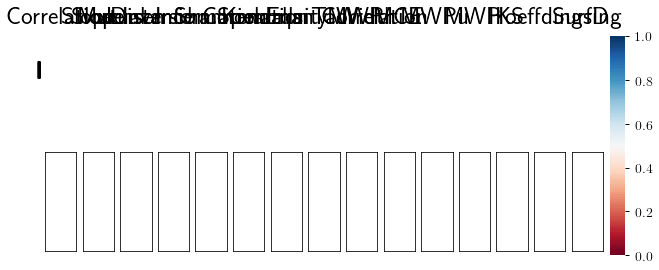

In [31]:
fig, axes = plt.subplots(nrows=2, 
                    ncols=len([x for x in selectedData['testId'].unique() if "MWPr" not in x]),
                    figsize=(10,4), sharey=True, sharex=True)

axess = axes.reshape(-1)
cbar_ax = fig.add_axes([.91, 0.11, .02, 0.76])

measure = "powerAt95"
nDim = 3

tests = selectedTests
for i,x in enumerate(["I", "L"]):
    for j,y in enumerate(tests):
        subdata = selectedData[(selectedData["category"] == x) & 
                               (selectedData["testId"] == y) & 
                               (selectedData["nDim"] == nDim) &
                               selectedData["d"].isin([1,3,5,10,50,100]) ]
        d = subdata.groupby(["noise","d"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "d"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        ax = axes[i][j]

        sns.heatmap(dd, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=i == 0, cbar_ax=None if i else cbar_ax,
                   vmin=0, vmax=1)

        ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
        ax.set_title(r'%s - %s'%(x, y), y=1.04)
        ax.set_ylabel("")
        sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
        labels = ["0"] + sp + [""] + sp + [""] + sp + [""] + sp + [""] + sp + ["1"]
        labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
        ax.set_xticklabels(labels)
        
        
        if(j == 0):
            ax.set_ylabel(r'\textbf{%s}'%x, rotation=0, x=0.80)
        else:
            ax.set_ylabel("")
            
        if(i == 1):
            ax.set_xlabel(r'')
        else:
            ax.set_xlabel("")
            
        if(i == 0):
            ax.set_title(r'%s'%(y))
        else:
            ax.set_title("")


plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig9_1.pdf")

### Average Score

<IPython.core.display.Javascript object>


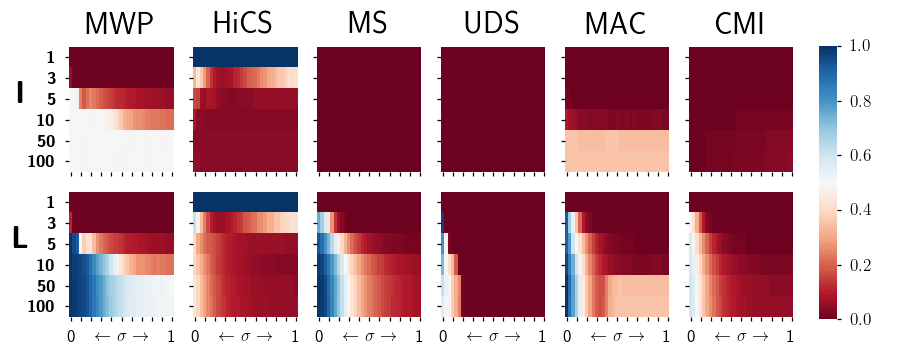

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [17]:
%matplotlib notebook

fig, axes = plt.subplots(nrows=2, 
                         ncols=len([x for x in selectedData['testId'].unique() if "MWPr" not in x]),
                         figsize=(10,4), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax = fig.add_axes([.91, 0.11, .02, 0.76])

measure = "avgContrast"
nDim = 3

tests = ["MWP", "HiCS", "MS", "UDS", "MAC", "CMI"]
for i,x in enumerate(["I", "L"]):
    for j,y in enumerate(tests):
        subdata = selectedData[(selectedData["category"] == x) & 
                               (selectedData["testId"] == y) & 
                               (selectedData["nDim"] == nDim) &
                               selectedData["d"].isin([1,3,5,10,50,100])  ]
        d = subdata.groupby(["noise","d"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "d"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        ax = axes[i][j]

        sns.heatmap(dd, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=i == 0, cbar_ax=None if i else cbar_ax,
                   vmin=0, vmax=1)

        ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
        ax.set_title(r'%s - %s'%(x, y), y=1.04)
        ax.set_ylabel("")
        sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
        labels = ["0"] + sp + [""] + sp + [""] + sp + [""] + sp + [""] + sp + ["1"]
        labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
        ax.set_xticklabels(labels)
        
        
        if(j == 0):
            ax.set_ylabel(r'\textbf{%s}'%x, rotation=0, x=0.80)
        else:
            ax.set_ylabel("")
            
        if(i == 1):
            ax.set_xlabel(r'')#, y=0.55)
        else:
            ax.set_xlabel("")
            
        if(i == 0):
            ax.set_title(r'%s'%(y))#, y=1.05)
        else:
            ax.set_title("")


plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig9_2.pdf")